Sources:
- https://onlinelibrary.wiley.com/doi/book/10.1002/9781118106907 (HG106 .A44)
- https://web.p.ebscohost.com/ehost/detail/detail?vid=0&sid=4e5f9e98-927b-488b-b494-01b7f1def4e6%40redis&bdata=JkF1dGhUeXBlPWlwJnNpdGU9ZWhvc3QtbGl2ZSZzY29wZT1zaXRl#AN=52240&db=nlebk
  (HG4925.5 .G74)

In [84]:
import pypfopt
print(pypfopt.__file__)

/opt/anaconda3/lib/python3.12/site-packages/pypfopt/__init__.py


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import random
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import CLA, plotting, expected_returns, risk_models

import yfinance as yf
from requests import Session
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass

session = CachedLimiterSession(
    limiter=Limiter(RequestRate(2, Duration.SECOND*1)),  # max 2 requests per 1 second
    bucket_class=MemoryQueueBucket,
    backend=SQLiteCache("yfinance.cache"),
)
# session.headers['User-agent'] = 'my-program/1.0'

Note: we can do daily returns, monthly returns, annual returns, etc., for different periods.
Also, the below code uses closing prices, which is somewhat arbitrary.

In [10]:
# stocks interested in
# tickers = ["MSFT", "APPL", "GOOGL"]
tickers = [
    "AAPL",  # Apple Inc.
    "MSFT",  # Microsoft Corporation
    "GOOGL", # Alphabet Inc.
    "AMZN",  # Amazon.com, Inc.
    "TSLA",  # Tesla, Inc.
    "META",  # Meta Platforms, Inc.
    "NFLX",  # Netflix, Inc.
    "NVDA",  # NVIDIA Corporation
    "JPM",   # JPMorgan Chase & Co.
    "BAC",   # Bank of America Corporation
    "WMT",   # Walmart Inc.
    "PG",    # Procter & Gamble Co.
    "V",     # Visa Inc.
    "MA",    # Mastercard Inc.
    "DIS",   # The Walt Disney Company
    "PEP",   # PepsiCo, Inc.
    "KO",    # The Coca-Cola Company
    "UNH",   # UnitedHealth Group Inc.
    "PFE",   # Pfizer Inc.
    "MRK",   # Merck & Co., Inc.
    "T",     # AT&T Inc.
    "VZ",    # Verizon Communications Inc.
    "CSCO",  # Cisco Systems, Inc.
    "INTC",  # Intel Corporation
    "ORCL",  # Oracle Corporation
    "ADBE",  # Adobe Inc.
    "CRM",   # Salesforce, Inc.
    "BABA",  # Alibaba Group Holding Limited
    "XOM",   # Exxon Mobil Corporation
    "CVX",   # Chevron Corporation
    "GS",    # Goldman Sachs Group, Inc.
    "SPY",   # SPDR S&P 500 ETF Trust
    "QQQ",   # Invesco QQQ Trust (Nasdaq-100 ETF)
    "IWM",   # iShares Russell 2000 ETF
    "DIA",   # SPDR Dow Jones Industrial Average ETF Trust
    "TLT",   # iShares 20+ Year Treasury Bond ETF
    "GLD",   # SPDR Gold Trust (Gold ETF)
    "SLV",   # iShares Silver Trust (Silver ETF)
    "XLF",   # Financial Select Sector SPDR ETF
    "XLK",   # Technology Select Sector SPDR ETF
    "XLE",   # Energy Select Sector SPDR ETF
    "XLV",   # Health Care Select Sector SPDR ETF
    "ARKK",  # ARK Innovation ETF
    "GDX",   # VanEck Vectors Gold Miners ETF
    "BA",    # Boeing Co.
    "NKE",   # Nike Inc.
    "MCD",   # McDonald's Corporation
    "SBUX"   # Starbucks Corporation
]


In [12]:
# tickers = ['intc', 'gme', 'cost', 'vst'] # -> for sample


start_date = '2024-06-01' # inclusive
end_date = '2024-09-20' # exclusive

# set number of assets (= number of qubits)
num_assets = len(tickers)

close_df = pd.DataFrame()
open_df = pd.DataFrame()
high_df = pd.DataFrame()
low_df = pd.DataFrame()
volume_df = pd.DataFrame()

# for i, ticker in enumerate(tickers):
#     yf_ticker = yf.Ticker(ticker, session=session)
#     close_df[ticker] = yf_ticker.history(start=start_date, end=end_date)["Close"]

In [14]:
for stock in tickers:
    yf_ticker = yf.Ticker(stock)
    # Fetch all OHLC data in one call
    hist = yf_ticker.history(start=start_date, end=end_date)
    
    # Store the relevant OHLC data in respective DataFrames
    close_df[stock] = hist["Close"]
    open_df[stock] = hist["Open"]
    high_df[stock] = hist["High"]
    low_df[stock] = hist["Low"]
    volume_df[stock] = hist["Volume"]

returns_df = close_df.pct_change().dropna()

# expected return for each asset
expected_returns_ = np.array(returns_df.mean())

# sample variance
variances = np.array(returns_df.cov())

# sample correlation
correlations = np.array(returns_df.corr())

expected_returns_, variances, correlations

(array([ 2.36097630e-03,  8.90120666e-04, -7.13834626e-04,  1.03761107e-03,
         5.10702460e-03,  2.35273396e-03,  1.51123589e-03,  1.12512942e-03,
         7.43116877e-04,  6.01417799e-04,  2.38113397e-03,  6.91194443e-04,
         8.06396588e-04,  1.50592364e-03, -1.11782869e-03,  5.18564963e-04,
         1.76736725e-03,  2.19884725e-03,  4.32088883e-04, -9.05357516e-04,
         2.56194845e-03,  1.24267187e-03,  1.51278931e-03, -3.67747194e-03,
         4.88478124e-03,  2.70832720e-03,  1.74995497e-03,  2.15036379e-03,
         3.69636780e-04, -8.70798357e-04,  1.58531854e-03,  1.13498070e-03,
         9.79466483e-04,  1.35061927e-03,  1.23794457e-03,  1.24441372e-03,
         1.33491644e-03,  3.20385607e-04,  1.41508158e-03,  9.85067433e-04,
        -9.61147239e-05,  1.07207249e-03,  1.56418370e-03,  1.70046133e-03,
        -2.12203507e-03, -1.55615433e-03,  1.79526166e-03,  2.80740381e-03]),
 array([[2.88140454e-04, 1.16583967e-04, 1.37980196e-04, ...,
         1.08509792e-04,

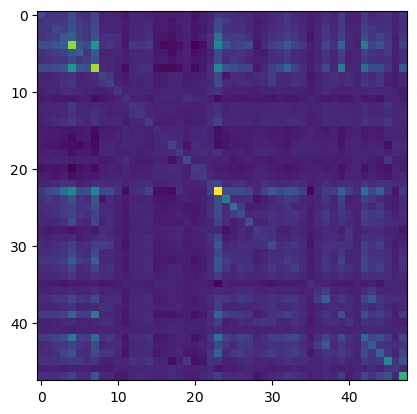

array([[2.88140454e-04, 1.16583967e-04, 1.37980196e-04, ...,
        1.08509792e-04, 3.34570744e-06, 1.06002063e-04],
       [1.16583967e-04, 1.57229519e-04, 1.49260035e-04, ...,
        1.00613152e-04, 1.11859241e-05, 9.11093021e-05],
       [1.37980196e-04, 1.49260035e-04, 2.61342386e-04, ...,
        1.26384542e-04, 3.85230773e-05, 8.14297273e-05],
       ...,
       [1.08509792e-04, 1.00613152e-04, 1.26384542e-04, ...,
        7.83626041e-04, 1.16839296e-04, 3.32864866e-04],
       [3.34570744e-06, 1.11859241e-05, 3.85230773e-05, ...,
        1.16839296e-04, 1.46155242e-04, 4.51448543e-05],
       [1.06002063e-04, 9.11093021e-05, 8.14297273e-05, ...,
        3.32864866e-04, 4.51448543e-05, 1.14877968e-03]])

In [15]:
# for the qiskit VQE demo:
mu = expected_returns_
sigma = variances

# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

sigma

Given weights $w_1 + \dots + w_n = 100 \%$, where $w_i = \frac{V_i}{V_p}$ is the $i$th asset's value as a fraction of the the portfolio's value:
- the portfolio's expected rate of return is the weighted average $k_p = \sum^n_{i=1} w_i k_{ei}$
- the portfolio's risk is the standard deviation $\sqrt{\sum^n_{i=1} \sum^n_{j=1} w_i w_j \text{Cov}_{ij}}$. (As you might imagine, the variation can also be a measure of risk.)

In [17]:
random_weights = [random.random() for i in range(num_assets)]
# normalize the weights
mag = sum(random_weights)
random_weights = [random_weights[i]/mag  for i in range (num_assets)]
print(sum(random_weights))


example_portfolio = [(i, random_weights[i]) for i in range(num_assets)]

weights = np.array(example_portfolio)[:,1]
example_return = weights.dot(expected_returns_)
example_return

1.0


0.0009147258861989505

In [18]:
example_risk = (
    weights.dot(variances.dot(weights))
) ** 0.5
example_risk

0.009025780748765573

In [19]:
# generate an efficient frontier graph using random portfolios

num_portfolios = 5000
returns = []
risks = []
weights = []

for _ in range(0, num_portfolios):
    portfolio_order = np.random.permutation(np.arange(num_assets))
    remaining_weight = 1
    _weights = np.zeros(num_assets)
    for i in portfolio_order[:-1]:
        _weight = np.random.random() * remaining_weight
        remaining_weight -= _weight
        _weights[i] = _weight
    _weights[portfolio_order[-1]] = remaining_weight
    returns.append(_weights.dot(expected_returns_))
    risks.append(_weights.dot(variances.dot(_weights)) ** 0.5)
    weights.append(_weights)

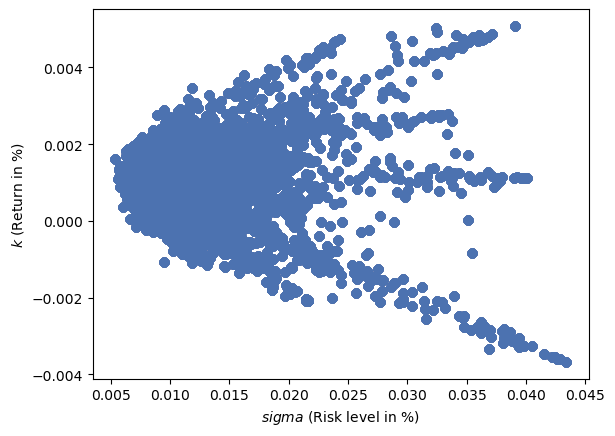

In [20]:
plt.plot(risks * 100, returns * 100, 'o')
plt.xlabel("$sigma$ (Risk level in %)")
plt.ylabel("$k$ (Return in %)")
plt.show()

In [29]:
max_sharpe = (0,)
for i in range(0, len(risks)):
    _return, _risk, _weights = returns[i], risks[i], weights[i]
    _risk = _risk
    _sharpe = _return / _risk
    if _sharpe > max_sharpe[0]:
        max_sharpe = (_sharpe, _risk, _return, _weights)
print(max_sharpe[3])
# print("Expected return:", max_sharpe[2])
# print("Expected annual return:", (1 + max_sharpe[2]) ** (252) - 1)
# print("Risk:", max_sharpe[2])
# print("Annual volatility:", (1 + max_sharpe[1]) ** (252) - 1)
print("Sharpe Ratio:", max_sharpe[0])

[2.39445698e-11 1.09816390e-13 2.89521067e-08 1.50590708e-17
 6.16098750e-04 1.52354390e-10 7.79597556e-16 8.85096410e-12
 6.41486065e-18 8.47052789e-15 1.98095419e-01 2.65840482e-11
 2.75729753e-12 5.30228228e-06 5.84745765e-09 4.13843680e-24
 3.38252647e-07 3.75056861e-24 9.18447299e-24 2.06580415e-05
 4.69272669e-01 4.29688250e-16 3.03144887e-17 2.60816674e-12
 1.98804612e-01 5.18960153e-07 2.09266734e-05 9.74134593e-04
 5.22978734e-12 5.28712805e-08 5.43449190e-25 2.15304511e-22
 4.73660922e-09 5.17225639e-09 2.55275116e-11 5.37884785e-16
 2.91970866e-14 1.94024977e-12 5.06832241e-05 1.24900215e-19
 1.81894132e-15 1.19123587e-02 9.41538166e-02 1.13994065e-07
 1.11544957e-12 2.60722523e-02 6.25211810e-22 1.01505969e-23]
Sharpe Ratio: 0.3121477100421844


In [31]:
# xref with pypfopt
# adapted from tutorial code from pypfopt/example/examples.ipynb on their gh rep
frequency=len(returns_df)
mu = expected_returns.mean_historical_return(close_df, frequency=frequency)
S = risk_models.sample_cov(close_df, frequency=frequency)

mu, S

(AAPL     0.180925
 MSFT     0.062780
 GOOGL   -0.061376
 AMZN     0.064652
 TSLA     0.383629
 META     0.173195
 NFLX     0.111283
 NVDA     0.025128
 JPM      0.048688
 BAC      0.037780
 WMT      0.189037
 PG       0.048112
 V        0.057075
 MA       0.114060
 DIS     -0.086493
 PEP      0.035903
 KO       0.138660
 UNH      0.169132
 PFE      0.026223
 MRK     -0.075531
 T        0.203809
 VZ       0.089778
 CSCO     0.112126
 INTC    -0.297653
 ORCL     0.408980
 ADBE     0.199125
 CRM      0.127640
 BABA     0.160631
 XOM      0.021703
 CVX     -0.068889
 GS       0.113918
 SPY      0.085301
 QQQ      0.068409
 IWM      0.097675
 DIA      0.094899
 TLT      0.094244
 GLD      0.101050
 SLV      0.007171
 XLF      0.108528
 XLK      0.063232
 XLE     -0.011961
 XLV      0.081687
 ARKK     0.103304
 GDX      0.118558
 BA      -0.162432
 NKE     -0.138335
 MCD      0.137863
 SBUX     0.187691
 dtype: float64,
            AAPL      MSFT     GOOGL      AMZN      TSLA      META     

PyPfOpt calculates the Sharpe ratio as $$S_R = \frac{\mu - \text{Risk-free rate}}{\sigma} = \frac{\mu - 0.02}{\sigma}$$

However, do also note that PyPfOpt calcluates <b>log returns</b>. This means the each return is $r_{i+1} = \log \left(1 + \frac{p_{i+1} - p_{i}}{p_{i}} \right)$ and the mean historical return is $\left[ \Pi_{i=2}^n \left( 1 + r_{i+1} \right) \right]^{n} - 1$. The covariance matrix is made with log returns, <u>then multiplied by $n$.</u>

OrderedDict({'AAPL': 0.08290493996219181, 'MSFT': 0.0, 'GOOGL': 0.0, 'AMZN': 0.0, 'TSLA': 0.015713514180099197, 'META': 0.01752351069456025, 'NFLX': 0.0, 'NVDA': 0.0, 'JPM': 0.037912167197593605, 'BAC': 0.0, 'WMT': 0.11809273292766498, 'PG': 0.0, 'V': 0.0, 'MA': 0.0, 'DIS': 0.0, 'PEP': 0.0, 'KO': 0.2631294832558918, 'UNH': 0.009950617428892446, 'PFE': 0.0, 'MRK': 0.0, 'T': 0.17350468722441567, 'VZ': 0.0, 'CSCO': 0.0, 'INTC': 0.0, 'ORCL': 0.08146632811603317, 'ADBE': 0.025558546697357867, 'CRM': 0.01881681128584581, 'BABA': 0.04441849909894928, 'XOM': 0.0, 'CVX': 0.0, 'GS': 0.0, 'SPY': 0.0, 'QQQ': 0.0, 'IWM': 0.0, 'DIA': 0.0, 'TLT': 0.11100816193050406, 'GLD': 0.0, 'SLV': 0.0, 'XLF': 0.0, 'XLK': 0.0, 'XLE': 0.0, 'XLV': 0.0, 'ARKK': 0.0, 'GDX': 0.0, 'BA': 0.0, 'NKE': 0.0, 'MCD': 0.0, 'SBUX': 0.0})
Expected annual return: 18.0%
Annual volatility: 4.6%
Sharpe Ratio: 3.49


<Axes: xlabel='Volatility', ylabel='Return'>

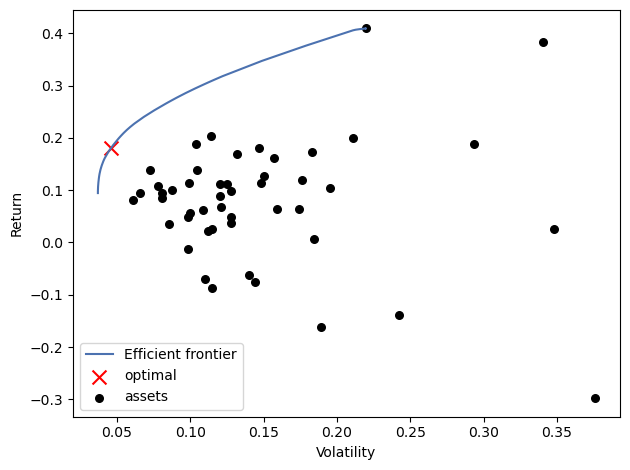

In [34]:
cla = CLA(mu, S)
print(cla.max_sharpe())
cla.portfolio_performance(verbose=True)
plotting.plot_efficient_frontier(cla)  # to plot

In [35]:
# TO-DO
# The weights of the "monte carlo" method seem to match the weight of the pypfopt.
# Need to figure out how to connect daily returns/risk with annualized returns/volatility of pypfopt.